<a href="https://colab.research.google.com/github/ronaksithape/OIBSIP/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2**

#Unemployement Analysis With Pyhton
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

##Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .express as px


##Loading Dataset

In [2]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


##Data Exploration

In [4]:
df.shape

(267, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


##Checking For Null Values

In [7]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


##Rename Columns

In [8]:
df.columns = ['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude']

In [9]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


##Checking The Correlation Between The Feature Of Dataset

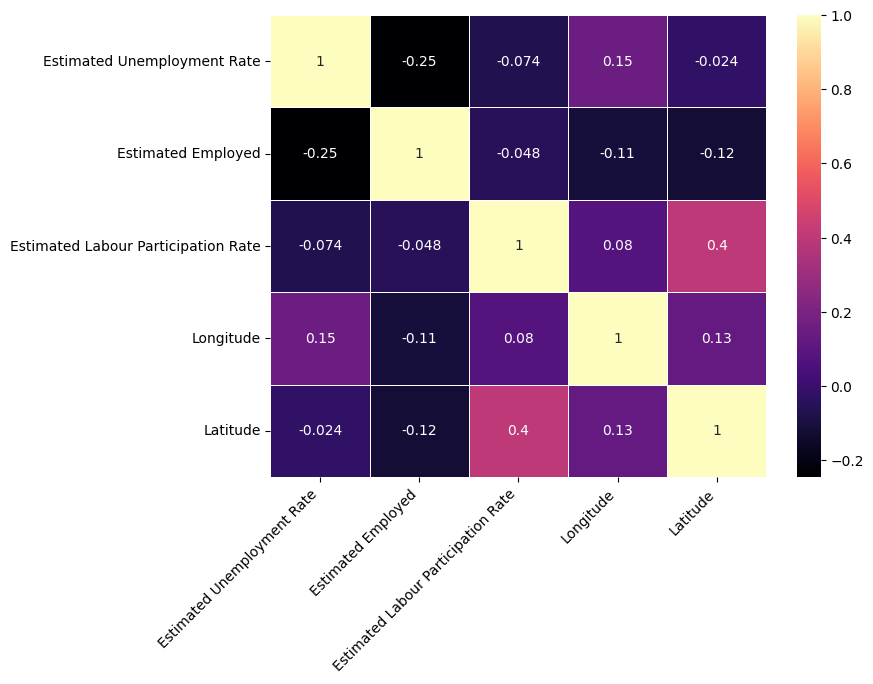

In [10]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))

ax = sns.heatmap(correlation_matrix, annot=True, cmap="magma", linewidths=0.5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


##Aanalyzing Data By Bar Graphs

In [11]:
a = px.bar(df,x='States',y='Estimated Unemployment Rate',color='States',
            title='Unemploymeny Rate (State Wise)',template='plotly')
a.update_layout(xaxis={'categoryorder':'total descending'})
a.show()

In [12]:
fg = px.histogram(df,x='Region',y='Estimated Unemployment Rate',color='Region',
                  title='Unemploymeny Rate (Statewise) by Histogram',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

##Analyze the unemployment rate of each Indian state

In [13]:
unemployment = df[['States','Region','Estimated Unemployment Rate']]
figure = px.sunburst(unemployment,path=['Region','States'],
                     values='Estimated Unemployment Rate',
                     width=600,height=500, color_continuous_scale='Viridis',
                     title="Unemployment Rate in India")
figure.show()